In [78]:
# Load packages
from citipy import citipy
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [79]:
# File to Load Uber Raw Data from Sep 2014 (1 million records) and Create a dictionary of raw data
file_to_load = "Resources/uber-rides-dataset_russia.csv"

# Read UBER Data File and store into Pandas data frame. This data Frame will carry million records
uber_data = pd.read_csv(file_to_load)
uber_data = pd.DataFrame(uber_data, columns= ["trip_start_time","pickup_lat","pickup_long","wait_time"])

uber_data = uber_data.rename(columns={"trip_start_time": "Date/Time", "pickup_lat": "lat","pickup_long": "long" })
uber_data.head()

,Date/Time,lat,long,wait_time
0,2015-05-11 17:26:00,60.031438,30.329826,00:07:27
1,2015-05-11 18:46:00,59.963014,30.307313,00:06:33
2,2015-05-13 09:15:00,60.031529,30.329416,00:16:07
3,2015-05-16 00:24:00,59.959883,30.311159,00:06:23
4,2015-05-16 01:29:00,59.934813,30.308553,00:10:06


In [80]:
#Convert The Date time column into Date, Time and Hour Column for detailed analysis
uber_data["Times"] = ""
tripDate = pd.to_datetime(uber_data["Date/Time"])
uber_data = uber_data.assign(Times = tripDate)
uber_data["Hour"] = uber_data.Times.dt.hour # Split of Hour from Datetime Stamp
uber_data["Date"] = uber_data.Times.dt.date # Split of Date from Datetime Stamp
uber_data["Times"] = uber_data.Times.dt.time # Split of Time from Datetime Stamp
uber_data["WaitTimeInMinutes"] = pd.DatetimeIndex(uber_data["wait_time"]).minute # Split of Time from Datetime Stamp
uber_data["Year"] = pd.DatetimeIndex(uber_data["Date"]).year
uber_data.head()

,Date/Time,lat,long,wait_time,Times,Hour,Date,WaitTimeInMinutes,Year
0,2015-05-11 17:26:00,60.031438,30.329826,00:07:27,17:26:00,17,2015-05-11,7,2015
1,2015-05-11 18:46:00,59.963014,30.307313,00:06:33,18:46:00,18,2015-05-11,6,2015
2,2015-05-13 09:15:00,60.031529,30.329416,00:16:07,09:15:00,9,2015-05-13,16,2015
3,2015-05-16 00:24:00,59.959883,30.311159,00:06:23,00:24:00,0,2015-05-16,6,2015
4,2015-05-16 01:29:00,59.934813,30.308553,00:10:06,01:29:00,1,2015-05-16,10,2015


In [81]:
# Calculating the City Name using the latitude and Longitude using CitiPy package
# Performance optimisation was perfromed to process 1mn records faster
uber_data["CityName"] = ""
for row in uber_data.itertuples():     
     uber_data["CityName"][row.Index] = citipy.nearest_city(row.lat,row.long).city_name    

uber_data.head()


C:\Users\aga641\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date/Time,lat,long,wait_time,Times,Hour,Date,WaitTimeInMinutes,Year,CityName
0,2015-05-11 17:26:00,60.031438,30.329826,00:07:27,17:26:00,17,2015-05-11,7,2015,pargolovo
1,2015-05-11 18:46:00,59.963014,30.307313,00:06:33,18:46:00,18,2015-05-11,6,2015,saint petersburg
2,2015-05-13 09:15:00,60.031529,30.329416,00:16:07,09:15:00,9,2015-05-13,16,2015,pargolovo
3,2015-05-16 00:24:00,59.959883,30.311159,00:06:23,00:24:00,0,2015-05-16,6,2015,saint petersburg
4,2015-05-16 01:29:00,59.934813,30.308553,00:10:06,01:29:00,1,2015-05-16,10,2015,saint petersburg


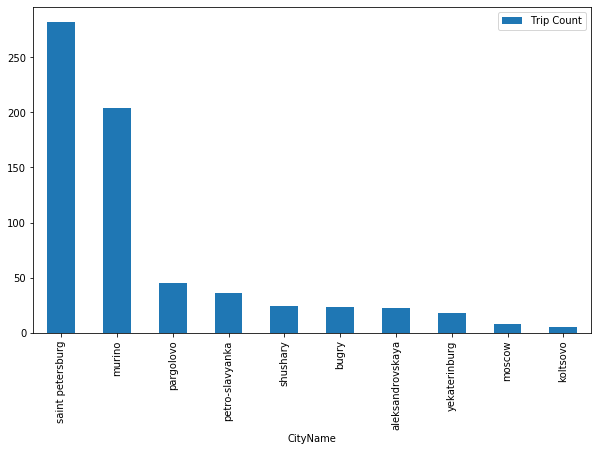

In [82]:
#Bar Plotting for Top 10 City for Rush City Analysis by count of trips in the city
uberTripsByCity = uber_data.groupby(["CityName"])["CityName"].count()
uberSummaryTrips2DF = pd.DataFrame({ "Trip Count": uberTripsByCity })
uberSummaryTrips2DF = uberSummaryTrips2DF.sort_values(by=["Trip Count"], ascending = False)
uberSummaryTrips2DF = uberSummaryTrips2DF.reset_index()
uberSummaryTrips2DF = uberSummaryTrips2DF.head(10)
uberSummaryTrips2DF.plot("CityName", "Trip Count",kind="bar",figsize=(10,6))
plt.savefig('Top 10 City for Rush City Analysis.png')
plt.show()

In [83]:
#This code is to derive trip analysis for all cities of UBER Data processed 

uberTripsByTime = uber_data.groupby("Hour")["Hour"].count()
rush_hour_df = pd.DataFrame({ "Trip Count": uberTripsByTime })
#rush_hour_df = rush_hour_df.sort_values(by=["Trip Count"], ascending = False)
rush_hour_df = rush_hour_df.reset_index()
rush_hour_df.head(10)

,Hour,Trip Count
0,0,9
1,1,3
2,3,4
3,4,3
4,5,9
5,7,13
6,8,16
7,9,37
8,10,61
9,11,58


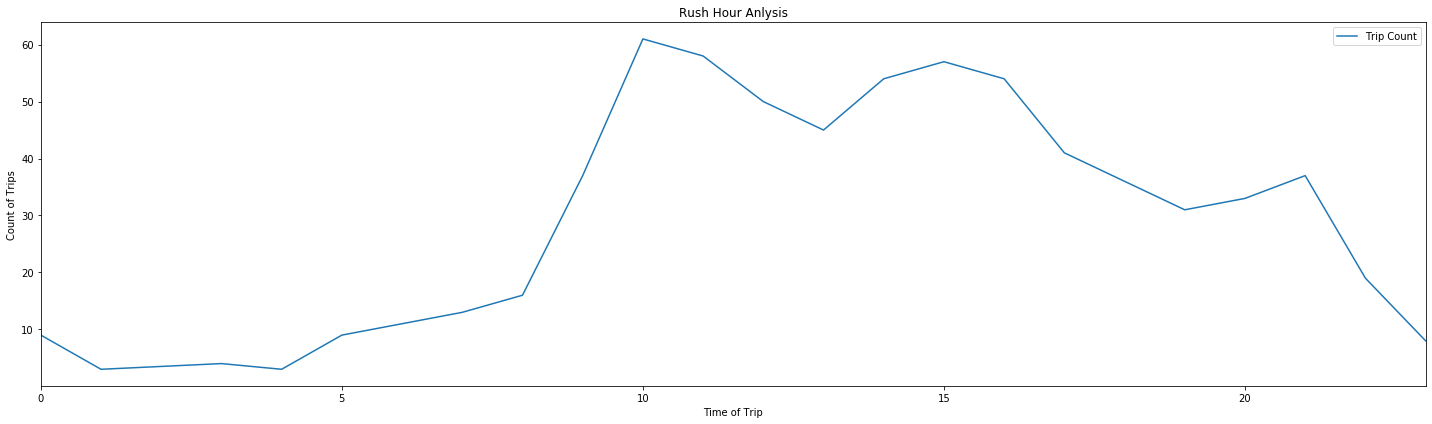

In [84]:
# Generate a bar plot showing number of data points for each Hour of Day using pandas to perfrom Rush Hour Analysis
rush_hour_df.plot("Hour", "Trip Count",kind="line",figsize=(20,6))
# Set a title for the chart
plt.title(f"Rush Hour Anlysis")
plt.xlabel("Time of Trip")
plt.ylabel("Count of Trips")
plt.tight_layout()

plt.show()



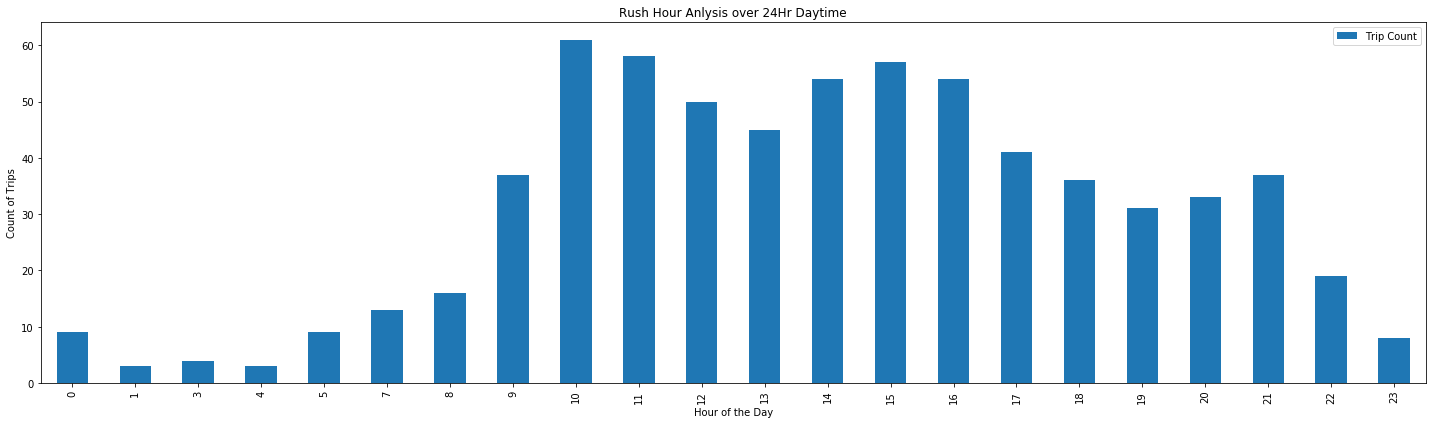

In [85]:
# Generate a bar plot to show Peak Rush Hour to Lowest Rush Hour using pandas
rush_hour_df.plot("Hour", "Trip Count",kind="bar",figsize=(20,6))
# Set a title for the chart
plt.title(f"Rush Hour Anlysis over 24Hr Daytime")
plt.xlabel("Hour of the Day")
plt.ylabel("Count of Trips")
plt.tight_layout()

plt.show()


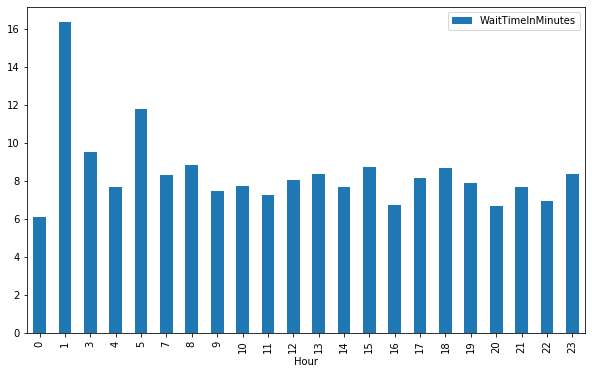

In [86]:
#Bar Plotting for Rush Hour Analysis based on wait time in each Hour of Day 
uberTripsByCity = uber_data.groupby("Hour")["WaitTimeInMinutes"].mean()
uberTripsByCity = uberTripsByCity.reset_index()
uberSummaryTrips2DF = pd.DataFrame(uberTripsByCity,columns=["Hour","WaitTimeInMinutes"])
#uberSummaryTrips2DF = uberSummaryTrips2DF.reset_index()
# uberSummaryTrips2DF = uberSummaryTrips2DF.head(10)
uberSummaryTrips2DF.plot("Hour","WaitTimeInMinutes",kind="bar",figsize=(10,6))
plt.savefig('Top 10 City for Rush City Analysis.png')
plt.show()

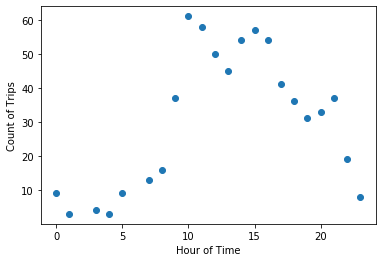

In [30]:
# Generate a scatter plot to show count of trips over 24 hour window

plt.scatter(rush_hour_df['Hour'],rush_hour_df['Trip Count'])
plt.xlabel('Hour of Time')
plt.ylabel('Count of Trips')
plt.show()

The correlation coefficient between both factors is 0.42
The regression values for each hour of the day as part of linear regression model is:
0     28.151623
1     29.373796
2     34.262487
3     33.040314
4     35.484659
5     30.595969
6     31.818141
7     36.706832
8     41.595523
9     26.929451
10    37.929005
11    40.373350
12    39.151177
13    42.817695
14    25.707278
15    24.485105
16    15.929897
17    22.040760
18    44.039868
19    19.596415
20    17.152069
21    20.818587
Name: Hour, dtype: float64
The r-squared is: 0.42057648646894985


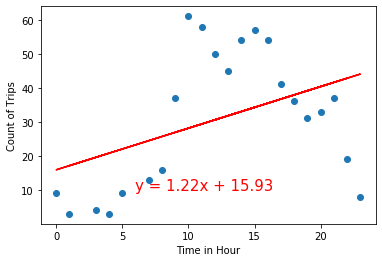

In [31]:
# Calculate the correlation coefficient and linear regression model for Hour of day time 
# and Trip Count for the UBER Data
# Coorelation was identified to be pretty good with 0.8 coorelation coefficient.

Hour_Time = rush_hour_df['Hour']
Trip_Count = rush_hour_df['Trip Count']
correlation = st.pearsonr(Hour_Time,Trip_Count)
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

# Calculate the linear regression model for for Hour of day time and Trip Count for the UBER Data
x_values = rush_hour_df['Hour']
y_values = rush_hour_df['Trip Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print("The regression values for each hour of the day as part of linear regression model is:")
print(regress_values)

# Plot the linear regression model on top of the previous scatter plot.
    
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Time in Hour')
plt.ylabel('Count of Trips')
print(f"The r-squared is: {rvalue}")
plt.show()